In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load combined train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed.npz") as npz_file:
    X_tr_np = npz_file["features"]
    y_tr = npz_file["labels"]
    print("X_tr shape:", X_tr_np.shape)
    print("y_tr shape:", y_tr.shape)
    
# load combined val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed.npz") as npz_file:
    X_val_np = npz_file["features"]
    y_val = npz_file["labels"]
    print("X_val shape:", X_val_np.shape)
    print("y_val shape:", y_val.shape)
    
# load combined test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed.npz") as npz_file:
    X_te_np = npz_file["features"]
    y_te = npz_file["labels"]
    print("X_te shape:", X_te_np.shape)
    print("y_te shape:", y_te.shape)

X_tr shape: (115027, 223)
y_tr shape: (115027,)
X_val shape: (41424, 223)
y_val shape: (41424,)
X_te shape: (41378, 223)
y_te shape: (41378,)


In [3]:
# load B term train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed_b.npz") as npz_file:
    X_tr_b_np = npz_file["features"]
    y_tr_b = npz_file["labels"]
    print("X_tr_b shape:", X_tr_b_np.shape)
    print("y_tr_b shape:", y_tr_b.shape)
    
# load B term val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed_b.npz") as npz_file:
    X_val_b_np = npz_file["features"]
    y_val_b = npz_file["labels"]
    print("X_val_b shape:", X_val_b_np.shape)
    print("y_val_b shape:", y_val_b.shape)
    
# load B term test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed_b.npz") as npz_file:
    X_te_b_np = npz_file["features"]
    y_te_b = npz_file["labels"]
    print("X_te_b shape:", X_te_b_np.shape)
    print("y_te_b shape:", y_te_b.shape)

X_tr_b shape: (44295, 125)
y_tr_b shape: (44295,)
X_val_b shape: (15387, 125)
y_val_b shape: (15387,)
X_te_b shape: (15871, 125)
y_te_b shape: (15871,)


In [4]:
# load J term train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed_j.npz") as npz_file:
    X_tr_j_np = npz_file["features"]
    y_tr_j = npz_file["labels"]
    print("X_tr_j shape:", X_tr_j_np.shape)
    print("y_tr_j shape:", y_tr_j.shape)
    
# load J term val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed_j.npz") as npz_file:
    X_val_j_np = npz_file["features"]
    y_val_j = npz_file["labels"]
    print("X_val_j shape:", X_val_j_np.shape)
    print("y_val_j shape:", y_val_j.shape)
    
# load J term test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed_j.npz") as npz_file:
    X_te_j_np = npz_file["features"]
    y_te_j = npz_file["labels"]
    print("X_te_j shape:", X_te_j_np.shape)
    print("y_te_j shape:", y_te_j.shape)

X_tr_j shape: (62447, 137)
y_tr_j shape: (62447,)
X_val_j shape: (22864, 137)
y_val_j shape: (22864,)
X_te_j shape: (22738, 137)
y_te_j shape: (22738,)


In [5]:
# convert all matrices to sparse format to use in models
from scipy.sparse import lil_matrix

X_tr = lil_matrix(X_tr_np, dtype = np.float32).tocsr()
X_val = lil_matrix(X_val_np, dtype = np.float32).tocsr()
X_te = lil_matrix(X_te_np, dtype = np.float32).tocsr()

X_tr_b = lil_matrix(X_tr_b_np, dtype = np.float32).tocsr()
X_val_b = lil_matrix(X_val_b_np, dtype = np.float32).tocsr()
X_te_b = lil_matrix(X_te_b_np, dtype = np.float32).tocsr()

X_tr_j = lil_matrix(X_tr_j_np, dtype = np.float32).tocsr()
X_val_j = lil_matrix(X_val_j_np, dtype = np.float32).tocsr()
X_te_j = lil_matrix(X_te_j_np, dtype = np.float32).tocsr()

### Random Forest Classifier
#### Using Bagging (Bootstrap AGGregatING) to fight overfitting problem of simple Decision Trees
With bagging, we try to reduce the variance of an estimator by averaging the predictions from several instances of estimators trained on different samples of the data set. Random Forests are an example of bagging.

Say we have 5 points in $X$ $x_1, x_2, x_3, x_4, x_5$. The idea is to generate different data sets by sampling $X$. These are called bootstrap samples because we sample with replacement. Hence, each new data set will likely contain duplicates.

Example of 3 different sets:

$X_1 = x_1, x_2, x_3, x_4, x_5$

$X_2 = x_4, x_1, x_2, x_5, x_1$

$X_3 = x_2, x_4, x_3, x_2, x_5$

One estimator will be fitted on each set. To compute predictions, we average the predictions of each estimator.

In random forests, these estimators are decision trees. The advantage here is that the results are even more decorrelated because the decision tree will find different rules to structure the different subsets of samples.
___
I will base my random forest models on the observed depth of the value which led simple decision trees to train accuracies of ~99%. For our earlier created models, a depth of `max_depth = 28` brought us to 98.8%.

I will then use grid-search to find the optimal number of `n_estimators` to find a balance and reduce overfitting.

At first, I will test 4 values for `n_estimators` in the combined set to get a broad overview of which range of `n_estimators` I need to specify.

In [6]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid

# create pipeline
rf_pipe_prelim = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("rf", RandomForestClassifier(max_depth = 28, random_state = 0))
])

rf_grid1 = ParameterGrid({
    "rf__n_estimators": [10, 50, 100, 200] # test these values at first
})

In [7]:
# combined model
# loop through all combinations

# save results
rf_results1 = []

for param_n_estimator in rf_grid1:
    rf_pipe_prelim.set_params(**param_n_estimator)
    
    # fit pipe
    rf_pipe_prelim.fit(X_tr, y_tr)
    
    # calculate accuracy
    val_acc = rf_pipe_prelim.score(X_val, y_val)
    train_acc = rf_pipe_prelim.score(X_tr, y_tr)
    
    # append accuracy to param_max_depth
    param_n_estimator["val_acc"] = val_acc
    param_n_estimator["train_acc"] = train_acc
    
    # append param_max_depth to dt_results
    rf_results1.append(param_n_estimator)
    
# transform list to DataFrame
rf_results1 = pd.DataFrame(rf_results1)
rf_results1.sort_values(by = "val_acc", ascending = False)

,rf__n_estimators,train_acc,val_acc
3,200,0.984856,0.649817
2,100,0.984421,0.647620
1,50,0.982265,0.645688
0,10,0.971189,0.622369


Observing these results, I think that we can't beat the accuracy level of around ~65% independently of any model. The random forests overfit very strongly even at 50 estimators.

As there is only a marginal difference in accuracy among 50, 100, and 200 estimators, I will instead, mainly for reasons of computational capacity, choose to fix the random forest classifier at `n_estimators = 50` and vary the depth now to find a model which doesn't overfit at 100% while the validation accuracy stays at ~64%.

In [8]:
# combined model

# create second pipeline
rf_pipe_prelim2 = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("rf", RandomForestClassifier(n_estimators = 50, random_state = 0))
])

rf_grid2 = ParameterGrid({
    "rf__max_depth": np.arange(1, 20, 2) # depth of 28 is already 100% train accuracy
})

# loop through all combinations

# save results
rf_results2 = []

for param_max_depth in rf_grid2:
    rf_pipe_prelim2.set_params(**param_max_depth)
    
    # fit pipe
    rf_pipe_prelim2.fit(X_tr, y_tr)
    
    # calculate accuracy
    val_acc = rf_pipe_prelim2.score(X_val, y_val)
    train_acc = rf_pipe_prelim2.score(X_tr, y_tr)
    
    # append accuracy to param_max_depth
    param_max_depth["val_acc"] = val_acc
    param_max_depth["train_acc"] = train_acc
    
    # append param_max_depth to dt_results
    rf_results2.append(param_max_depth)
    
# transform list to DataFrame
rf_results2 = pd.DataFrame(rf_results2)
rf_results2.sort_values(by = "val_acc", ascending = False)

,rf__max_depth,train_acc,val_acc
9,19,0.848218,0.643999
8,17,0.800447,0.639243
7,15,0.746729,0.635042
6,13,0.696967,0.626473
5,11,0.661853,0.620775
4,9,0.626418,0.603611
3,7,0.594373,0.572615
2,5,0.588158,0.565904
0,1,0.584393,0.562766
1,3,0.584393,0.562766


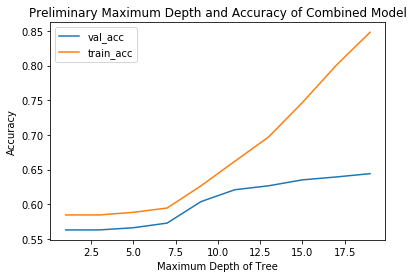

In [9]:
# visualize results
plt.plot(rf_results2["rf__max_depth"], rf_results2["val_acc"], label = "val_acc")
plt.plot(rf_results2["rf__max_depth"], rf_results2["train_acc"], label = "train_acc")
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Accuracy")
plt.title("Preliminary Maximum Depth and Accuracy of Combined Model")
plt.legend()
plt.show()

In this case, we can see that every model is overfitting at least ~2 percentage points, starting already at `max_depth = 1`. The difference here is that we can observe a zone up to around `max_depth = 10` where both train and validation set accuracies rise but overfitting doesn't.

Based on these findings, I will now create a `ParameterGrid` of a mix of the realistic ranges in order to find the optimal combination of `max_depth` and `n_estimators`. These combinations will then be tested on the combined, B-, and J-term sets.

In [10]:
# combined model

# create second pipeline
rf_pipe = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("rf", RandomForestClassifier(random_state = 0))
])

rf_grid = ParameterGrid({
    "rf__max_depth": np.arange(1, 16, 3),
    "rf__n_estimators": [10, 20, 30, 40, 50]
})

# loop through all combinations

# save results
rf_results = []

for params in rf_grid:
    rf_pipe.set_params(**params)
    
    # fit pipe
    rf_pipe.fit(X_tr, y_tr)
    
    # calculate accuracy
    val_acc = rf_pipe.score(X_val, y_val)
    train_acc = rf_pipe.score(X_tr, y_tr)
    
    # append accuracy to param_max_depth
    params["val_acc"] = val_acc
    params["train_acc"] = train_acc
    
    # append param_max_depth to dt_results
    rf_results.append(params)
    
# transform list to DataFrame
rf_results = pd.DataFrame(rf_results)
rf_results.sort_values(by = "val_acc", ascending = False)[:10]

,rf__max_depth,rf__n_estimators,train_acc,val_acc
21,13,20,0.703939,0.630697
20,13,10,0.699001,0.627221
24,13,50,0.696967,0.626473
23,13,40,0.695767,0.625700
22,13,30,0.693794,0.624638
16,10,20,0.643884,0.614113
18,10,40,0.640771,0.612833
19,10,50,0.640919,0.611892
17,10,30,0.636711,0.608681
15,10,10,0.639015,0.608657


In [11]:
rf_results["diff"] = rf_results["train_acc"] - rf_results["val_acc"]
rf_results.sort_values(by = "val_acc", ascending = False)[:10]

,rf__max_depth,rf__n_estimators,train_acc,val_acc,diff
21,13,20,0.703939,0.630697,0.073242
20,13,10,0.699001,0.627221,0.071780
24,13,50,0.696967,0.626473,0.070494
23,13,40,0.695767,0.625700,0.070067
22,13,30,0.693794,0.624638,0.069156
16,10,20,0.643884,0.614113,0.029771
18,10,40,0.640771,0.612833,0.027938
19,10,50,0.640919,0.611892,0.029027
17,10,30,0.636711,0.608681,0.028030
15,10,10,0.639015,0.608657,0.030358


We can see here that `max_depth` clearly dominates the model results. At a depth of `max_depth = 13`, the model overfits roughly 7 percentage points, with validation accuracy limited to ~63%.

In this case, I will take the parameters `max_depth = 10` and `n_estimators = 20`. The model still overfits roughly 3 percentage points, but it results in a validation accuracy of 61.41%, which is on a higher level than the next best results with maximum depths of 7 and still present overfitting.

In [12]:
# B term
# loop through all combinations

# save results
rf_results_b = []

for params in rf_grid:
    rf_pipe.set_params(**params)
    
    # fit pipe
    rf_pipe.fit(X_tr_b, y_tr_b)
    
    # calculate accuracy
    val_acc = rf_pipe.score(X_val_b, y_val_b)
    train_acc = rf_pipe.score(X_tr_b, y_tr_b)
    
    # append accuracy to param_max_depth
    params["val_acc"] = val_acc
    params["train_acc"] = train_acc
    
    # append param_max_depth to dt_results
    rf_results_b.append(params)
    
# transform list to DataFrame
rf_results_b = pd.DataFrame(rf_results_b)
rf_results_b.sort_values(by = "val_acc", ascending = False)[:10]

,rf__max_depth,rf__n_estimators,train_acc,val_acc
24,13,50,0.778034,0.645870
23,13,40,0.779930,0.645025
21,13,20,0.782459,0.642165
22,13,30,0.778485,0.641646
20,13,10,0.783023,0.637616
19,10,50,0.686421,0.637356
18,10,40,0.681905,0.635601
15,10,10,0.698002,0.634302
16,10,20,0.684931,0.632092
10,7,10,0.650119,0.630467


In [13]:
rf_results_b["diff"] = rf_results_b["train_acc"] - rf_results_b["val_acc"]
rf_results_b.sort_values(by = "val_acc", ascending = False)[:10]

,rf__max_depth,rf__n_estimators,train_acc,val_acc,diff
24,13,50,0.778034,0.645870,0.132164
23,13,40,0.779930,0.645025,0.134905
21,13,20,0.782459,0.642165,0.140293
22,13,30,0.778485,0.641646,0.136840
20,13,10,0.783023,0.637616,0.145407
19,10,50,0.686421,0.637356,0.049064
18,10,40,0.681905,0.635601,0.046304
15,10,10,0.698002,0.634302,0.063700
16,10,20,0.684931,0.632092,0.052839
10,7,10,0.650119,0.630467,0.019651


We can see here that the B-term model overfits even stronger at `max_depth = 13` with train accuracies around 78% and validation accuracies still limited to 64.5%.

In this case, I will take the combination of `max_depth = 7` and `n_estimators = 10`. This results in only ~2 percentage points overfitting while maintaining a validation accuracy of 63%.

In [14]:
# J term
# loop through all combinations

# save results
rf_results_j = []

for params in rf_grid:
    rf_pipe.set_params(**params)
    
    # fit pipe
    rf_pipe.fit(X_tr_j, y_tr_j)
    
    # calculate accuracy
    val_acc = rf_pipe.score(X_val_j, y_val_j)
    train_acc = rf_pipe.score(X_tr_j, y_tr_j)
    
    # append accuracy to param_max_depth
    params["val_acc"] = val_acc
    params["train_acc"] = train_acc
    
    # append param_max_depth to dt_results
    rf_results_j.append(params)
    
# transform list to DataFrame
rf_results_j = pd.DataFrame(rf_results_j)
rf_results_j.sort_values(by = "val_acc", ascending = False)[:10]

,rf__max_depth,rf__n_estimators,train_acc,val_acc
24,13,50,0.761830,0.666025
22,13,30,0.764296,0.665938
23,13,40,0.761910,0.665194
21,13,20,0.761157,0.664319
20,13,10,0.756385,0.660821
17,10,30,0.703396,0.654829
19,10,50,0.701171,0.652554
18,10,40,0.703220,0.652467
16,10,20,0.695053,0.650542
15,10,10,0.684949,0.641051


In [15]:
rf_results_j["diff"] = rf_results_j["train_acc"] - rf_results_j["val_acc"]
rf_results_j.sort_values(by = "val_acc", ascending = False)[:15]

,rf__max_depth,rf__n_estimators,train_acc,val_acc,diff
24,13,50,0.761830,0.666025,0.095805
22,13,30,0.764296,0.665938,0.098358
23,13,40,0.761910,0.665194,0.096716
21,13,20,0.761157,0.664319,0.096838
20,13,10,0.756385,0.660821,0.095565
17,10,30,0.703396,0.654829,0.048568
19,10,50,0.701171,0.652554,0.048616
18,10,40,0.703220,0.652467,0.050754
16,10,20,0.695053,0.650542,0.044511
15,10,10,0.684949,0.641051,0.043897


In this case, the model overfits less than the B-term, which is a development we haven't seen until now. We also reach validation accuracies in the ranges of 66.6%, which is higher than the decision tree and random forest models. Nevertheless, the model overfits 9.5 percentage points at that stage, which makes the scores again faulty in future generalization attempts.

For the J-term model, I will use the combination of `max_depth = 7` and `n_estimators = 40`, which gives us a validation accuracy of 62.96% with just below 2 percentage points overfitting.

We will now evaluate our tuned models on the actual test set.

In [16]:
# evaluate tuned models on test set

# combined model
pipe_rf = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("rf", RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 0))])

pipe_rf.fit(X_tr, y_tr)

rf_acc = pipe_rf.score(X_te, y_te)
print("random forest accuracy of combined model = {:.4f}".format(rf_acc))

# B term
pipe_rf_b = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("rf", RandomForestClassifier(max_depth = 7, n_estimators = 10, random_state = 0))])

pipe_rf_b.fit(X_tr_b, y_tr_b)

rf_acc_b = pipe_rf_b.score(X_te_b, y_te_b)
print("random forest accuracy of B-term = {:.4f}".format(rf_acc_b))

# J term
pipe_rf_j = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("rf", RandomForestClassifier(max_depth = 7, n_estimators = 40, random_state = 0))])

pipe_rf_j.fit(X_tr_j, y_tr_j)

rf_acc_j = pipe_rf_j.score(X_te_j, y_te_j)
print("random forest accuracy of J-term = {:.4f}".format(rf_acc_j))

random forest accuracy of combined model = 0.6279
random forest accuracy of B-term = 0.6456
random forest accuracy of J-term = 0.6110


Our final results for the random forest classifier are:
* Combined set:
    * train: 64.39%, val: 61.41%, test: 62.79%
* B term:
    * train: 65.01%, val: 63.05%, test: 64.56%
* J term:
    * train: 64.89%, val: 62.96%, test: 61.10%
    
Every single model here has a generalization problem. The combined model overfits roughly 1.5 percentage points, the B-term overfits again the least with only 0.5 percentage points, and the J ther overfits again the most with almost 4 percentage points. 

The B-term also has the best performance here, which could be that the B-term has more "focussed" data that allows the algorithm to find more concise trends and thus create better predictions. However, in simple decision trees, the B-term was the worst performing model with 64.08% accuracy. 

All in all, random forests couldn't negate the problem of overfitting and couldn't consistently beat the simple decision tree results. 

In simple decision trees, the worst performing model had an accuracy of 64.06%, here we are down to 61.10%. On one hand, we are able to consistently beat the most-frequent baseline, but in the end we received models that overfit more strongly than simple decision trees and thus generalize worse on previously unseen test data.

We will now evaluate and discuss the predictions more deeply with a confusion matrix and classification report. 

In [17]:
from sklearn.metrics import confusion_matrix

# get predictions in array
rf_preds = pipe_rf.predict(X_te)

# create confusion matrix
rf_matrix = confusion_matrix(y_true = y_te, y_pred = rf_preds)

# convert matrix to DataFrame
rf_matrix_df = pd.DataFrame(data = rf_matrix, columns = ["pred: Fail", "pred: Withdrawn",
                                                                "pred: Pass", "pred: Distinction"],
                               index = ["true: Fail", "true: Withdrawn", "true: Pass", "true: Distinction"])
rf_matrix_df

,pred: Fail,pred: Withdrawn,pred: Pass,pred: Distinction
true: Fail,68,4,5773,4
true: Withdrawn,0,1081,5017,383
true: Pass,48,117,23922,38
true: Distinction,8,934,3069,912


In [18]:
from sklearn.metrics import classification_report

# print classification report to see recall and precision scores
rf_report = classification_report(y_true = y_te, y_pred = rf_preds)
print(rf_report)

              precision    recall  f1-score   support

           0       0.55      0.01      0.02      5849
           1       0.51      0.17      0.25      6481
           2       0.63      0.99      0.77     24125
           3       0.68      0.19      0.29      4923

   micro avg       0.63      0.63      0.63     41378
   macro avg       0.59      0.34      0.33     41378
weighted avg       0.61      0.63      0.53     41378



The confusion matrix shows that this estimator is also heavily biased in favor of `Pass`. 

We reach again a recall score of 97% for class `2`, but this time we do have at least some predictions of `Fail` values. Then again, only 1% of the true values are predicted by the model, so it is still a model with very high false negativity rate.

This model reaches a 68% precision score for class `3`, i.e. `Distinction`. At first this may sound good that 68% of our `Distinction` predictions are correct, the recall score of 19%, however, shows that only around $\frac{1}{5}$ of all actual `Distinction` finishing students were recognized. The same is true for 17% regarding class `1`, and again only 1% for class `0`, i.e. `Fail`. 

#### Main problem of the model
Like in all of our models, the recall score of 1% for class `Fail` enables the students to feel more comfortable about their performance than they should be. In a good model, this false negativity rate in which positive = `Fail` and negative = `Pass` should be reduced. It is more acceptable to predict `Pass` when the student is finishing with `Distinction` than it is to predict `Pass` when the student withdraws or fails. 

The ROC-curve will again visualize the problem of this model's classification between `Pass` and `Fail` in a simplified binary setting.

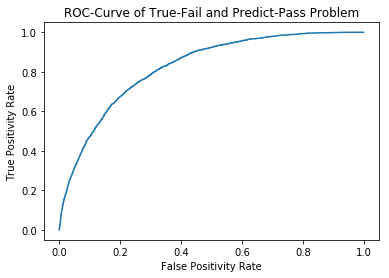

In [19]:
from sklearn.metrics import roc_curve

# get all probabilities into one variable
rf_probs = pipe_rf.predict_proba(X_te)

# roc_curve returns three arrays, false positivity rate, true positivity rate (recall) and thresholds
fpr, tpr, thresholds = roc_curve(y_true = y_te, y_score = rf_probs[:, 0], # positive class = Fail / 0
                                pos_label = 0) 

# create DataFrame out of the three arrays
roc_df = pd.DataFrame({
    "fpr": fpr,
    "tpr": tpr,
    "thresholds": thresholds
})

# plot ROC curve 
plt.plot(fpr, tpr)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("ROC-Curve of True-Fail and Predict-Pass Problem")
plt.show()

We can observe here visually that the curve is similar to the logistic regression model. A good model with a high recall would have a curve towards the top left corner, which would result from having a high TPR with a low FPR at the same time. 

In this case, we can only reach high TPR while also having many false positive misclassifications, so our model definitely lacks the needed nuance. The false negative classifications would also drop logically if our model had a higher TPR rate as FNR can be deduced from the TPR by calculating: $\text{FNR} = 1 - \text{TPR}$.

Let's see to what level we had to lower our probability threshold to receive at least 85% recall.

In [20]:
roc_df[7850:7860]

,fpr,tpr,thresholds
7850,0.378170,0.852282,0.141780
7851,0.378339,0.852282,0.141757
7852,0.378395,0.852282,0.141742
7853,0.378395,0.852453,0.141736
7854,0.378451,0.852453,0.141716
7855,0.378508,0.852453,0.141708
7856,0.378536,0.852453,0.141703
7857,0.378536,0.852624,0.141701
7858,0.378592,0.852624,0.141697
7859,0.378592,0.852795,0.141686


In this model, the difference between threshold changes and the effect on the TPR and FPR is slow and steady as the smoothness of our curve shows. 

To reach a TPR of in this random forest model, we would have to lower the probability threshold to around 14%. It is important to keep in mind that this is just a theoretical example that simplisticly created a binary problem out of a multi-class classification. In multi-clas problems, the final prediction is constantly affected by all other probability values. Changing the threshold here to 14% for the `Fail` class and thus classifying everything as `0` as soon as the probability hit that threshold would negatively affect all other classifications, so this is not a viable change on its own. 

All in all, this model got more biased in favor of the `Pass` class than the logistic regression. While we do reach 99% recall for class `Pass`, this doesn't help us in accurately determining final outcomes for students. The precision score for class `Pass` of 63% proves that. 

While the random forest models are better than our most-frequent baseline, a recall score of 1% for the `Fail` class and a recall score of 17% for the `Withdrawn` class show that the model significantly lacks prediction power for the two classes where it is critical to not have majorities of false negatives.

In [21]:
# get recall scores in variables
rf_recall_0 = 0.01
rf_recall_1 = 0.17
rf_recall_2 = 0.99
rf_recall_3 = 0.19

# create a DataFrame to store recall scores and save the file
save_df_recall = pd.DataFrame({
    "classes": [0, 1, 2, 3],
    "recall": [rf_recall_0, rf_recall_1, rf_recall_2, rf_recall_3]})

# save the df
save_df_recall.to_csv(
    "/Users/Ingo/Python Files/Capstone Project/results/05-random-forest-recall-results.csv",
    index = False)

# save roc_curve values in df
roc_df.to_csv(
    "/Users/Ingo/Python Files/Capstone Project/results/05-random-forest-roc-results.csv",
    index = False)

In [22]:
# create a DataFrame to store our the test accuracies and save the file
save_df = pd.DataFrame({
    "model": ["rf", "rf_b", "rf_j"],
    "test_accuracy": [rf_acc, rf_acc_b, rf_acc_j]})

# save the df
save_df.to_csv("/Users/Ingo/Python Files/Capstone Project/results/05-random-forest-results.csv",
              index = False)